# US Accidents Exploratory Data Analysis

### Data Preparations and Cleaning:

<br> 1. load the csv file using pandas
<br> 2. Explore the data set
<br> 3. Fix the missing or wrong values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('US_Accidents_March23.csv')

In [4]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
#exploring the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
#Count the numeric columns

numerics=['int16','int32','int64','float16','float32','float64']

column_data = data.select_dtypes(include=numerics)
len(column_data.columns)

13

In [7]:
#count the missing values and sort it in descending order to see the maximum missing values in particular columns

data.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [8]:
#percentage of missing values

missing_percentage= data.isna().sum().sort_values(ascending=False)/len(data)

In [9]:
missing_percentage

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

Remove the columns you dont want to use.

In [10]:
#picking the specific columns for analysis
data.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Exploratory Data Analysis

columns to analyse
<br>1. City
<br>2. Start Time
<br>3. Source
<br>4. Weather Conditions
<br>5. Road Features


### CITY

In [11]:
data.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [12]:
#count unique cities

cities= data.City.unique()
len(cities)

13679

In [13]:
'New York' in data.City

False

This dataset does not contain records for New York City.

In [14]:
#count number of accident occured in a city

cities_by_accident= data.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [15]:
#top 15 cities

cities_by_accident[:15]

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Atlanta         68186
Sacramento      66264
San Diego       55504
Phoenix         53974
Minneapolis     51488
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 15 Cities With Highest Accidents')

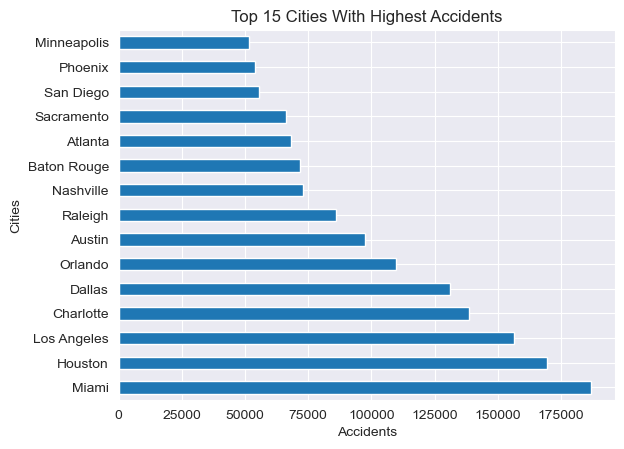

In [16]:
cities_by_accident[:15].plot(kind='barh')
plt.xlabel('Accidents')
plt.ylabel('Cities')
plt.title('Top 15 Cities With Highest Accidents')

Text(0.5, 1.0, 'Distribution of Accidents')

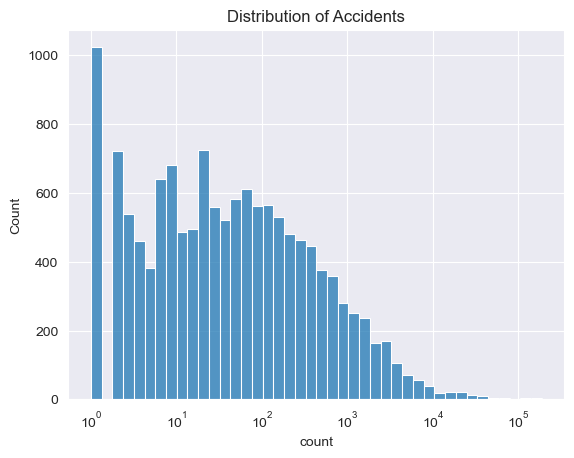

In [17]:
#figuring out the distribution of accidents

sns.histplot(cities_by_accident, log_scale=True)
plt.title('Distribution of Accidents')

In [18]:
cities_by_accident[cities_by_accident==1].sum()

1023

Only 1 accident has occured in each of 1023 cities

In [19]:
high_accident_cities= cities_by_accident[cities_by_accident>= 1000]
low_accident_cities= cities_by_accident[cities_by_accident<1000]

In [20]:
len(high_accident_cities)/len(cities)

0.08904159660793917

Less than 8% of cities have more than 1000 yearly accidents.

<Axes: xlabel='count', ylabel='Density'>

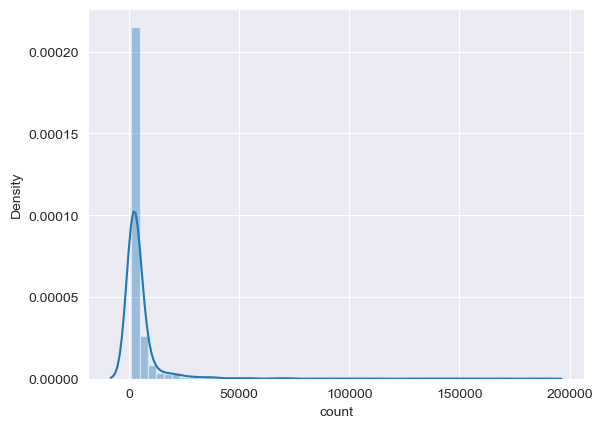

In [21]:
sns.distplot(high_accident_cities)

In [22]:
len(low_accident_cities)/len(cities)

0.910885298632941

<Axes: xlabel='count', ylabel='Density'>

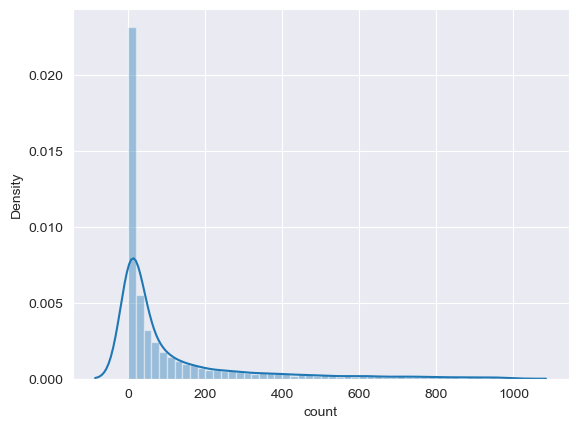

In [23]:
sns.distplot(low_accident_cities)

### SEVERITY

In [24]:
df_severity = data.groupby('Severity')['ID'].count()
df_severity

Severity
1      67366
2    6156981
3    1299337
4     204710
Name: ID, dtype: int64

Text(0.5, 1.0, 'Degree of Severity')

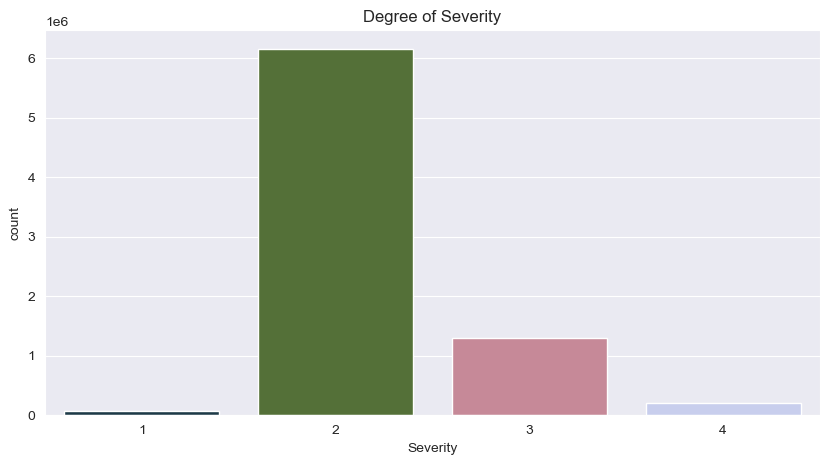

In [26]:
fig, ax = plt.subplots(figsize = (10,5))
sev = sns.countplot(x="Severity", data=data, palette = "cubehelix")
sev.set_title("Degree of Severity")

In [25]:
# converting Start_Time into datetime

data["Start_Time"] = pd.to_datetime(data["Start_Time"], format="mixed", errors='coerce', dayfirst=True)

In [26]:
#extracting year
data["Year"] = data["Start_Time"].dt.year

<Axes: xlabel='Year', ylabel='count'>

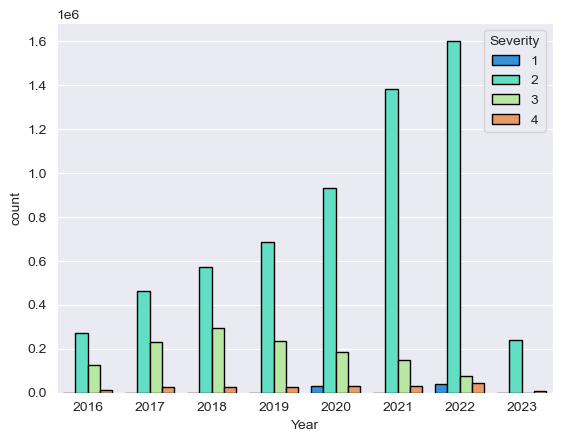

In [27]:
year_df = pd.DataFrame(data['Year'].value_counts()).reset_index().sort_values(by='Year', ascending=True)
year = year_df.rename(columns={'Year':'year','count':'cases'})

# plotting graph to see year trend

sns.countplot(data=data[['Severity','Year']] , x = 'Year' , hue='Severity' , palette = 'rainbow', edgecolor='black')



Above graph indicates that Degree 2 severity of accidents has occured the most compared to degree 3 and degree 4

### START TIME

In [28]:
data.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [29]:
#converting datatype object to datetime
data.Start_Time= pd.to_datetime(data['Start_Time'], format='mixed',dayfirst= False)

In [30]:
data.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [31]:
data.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int32

Text(0.5, 1.0, 'Accidents occured in hours')

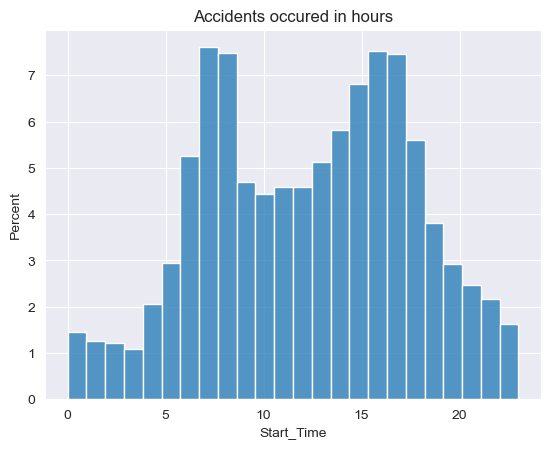

In [32]:
#ploting the graph to see the accidents occured on particular hours of the day

sns.histplot(data.Start_Time.dt.hour,bins=24, stat='percent')
plt.title('Accidents occured in hours')

From the above the graph it is observed that most of the accidents has occured in the morning between 7am to 9am, and in the evening between 3pm to 6pm (maybe be due to office hours)

Text(0.5, 1.0, 'Accidents occured on days')

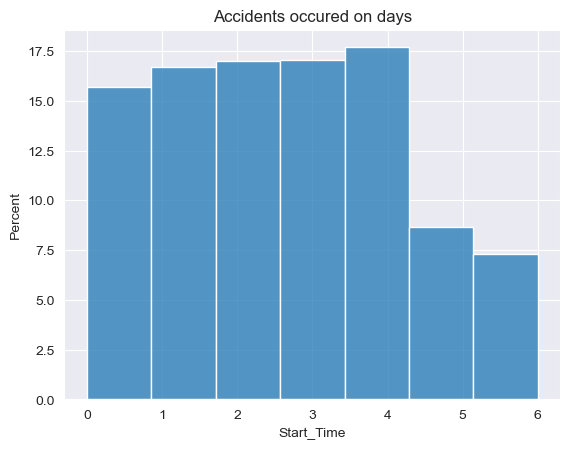

In [32]:
#plotting the graph to see the accidents occured on particular day of the week

sns.histplot(data.Start_Time.dt.dayofweek,bins=7, stat='percent')
plt.title('Accidents occured on days')

A slight higher number of accidents are observed on friday, while lowest number of accident are observed on the weekends

<Axes: xlabel='Start_Time'>

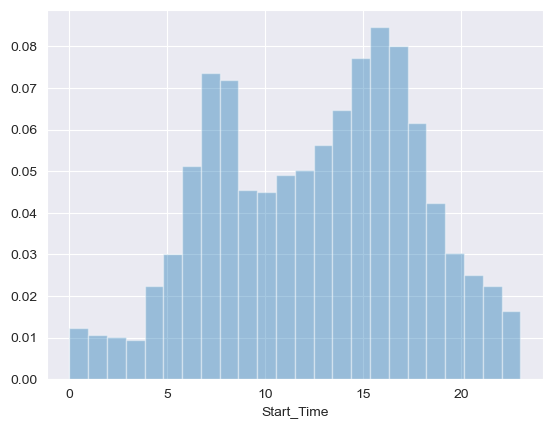

In [33]:
#checking peak hour on fridays

fridays_start_time = data.Start_Time[data.Start_Time.dt.dayofweek == 4]
sns.distplot(fridays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

Peak hour on friday is between 4pm to 6pm

<Axes: xlabel='Start_Time'>

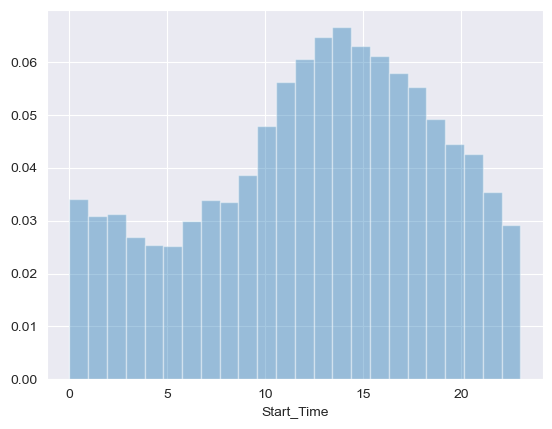

In [34]:
#checking peak hour for sundays

sundays_start_time = data.Start_Time[data.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

Peak hour of sunday is between 2pm to 4pm

<Axes: xlabel='Start_Time', ylabel='Percent'>

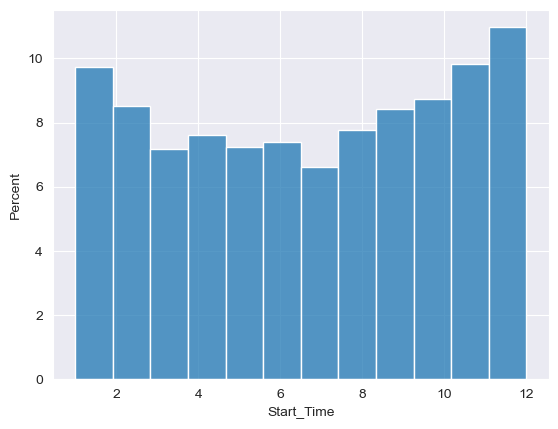

In [39]:
#plotting graph to see the accident occured in particular months

sns.histplot(data.Start_Time.dt.month,bins=12, stat='percent')

### YEAR

In [40]:
data.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int32

In [41]:
data_2016 =data[data.Start_Time.dt.year==2016]
data_2017 =data[data.Start_Time.dt.year==2017]
data_2018 =data[data.Start_Time.dt.year==2018]
data_2019 =data[data.Start_Time.dt.year==2019]
data_2020 =data[data.Start_Time.dt.year==2020]
data_2021 =data[data.Start_Time.dt.year==2021]
data_2022 =data[data.Start_Time.dt.year==2022]
data_2023 =data[data.Start_Time.dt.year==2023]

Text(0.5, 1.0, 'Accidents distribution in 2016')

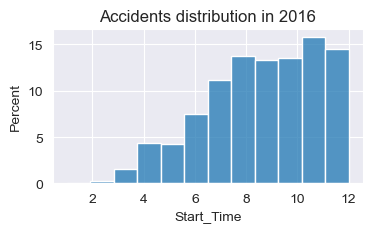

In [42]:
plt.figure(figsize=(4,2))
sns.histplot(data_2016.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2016')

Text(0.5, 1.0, 'Accidents distribution in 2017')

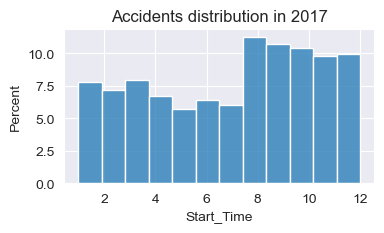

In [43]:
plt.figure(figsize=(4,2))
sns.histplot(data_2017.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2017')

Text(0.5, 1.0, 'Accidents distribution in 2018')

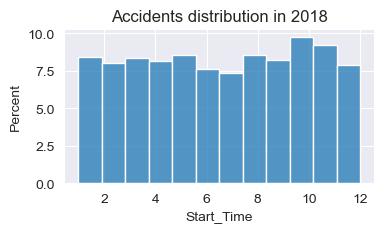

In [44]:
plt.figure(figsize=(4,2))
sns.histplot(data_2018.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2018')

Text(0.5, 1.0, 'Accidents distribution in 2019')

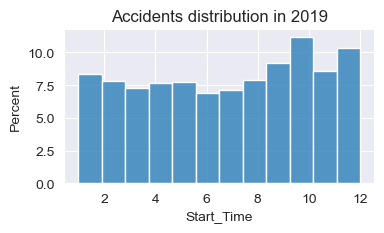

In [45]:
plt.figure(figsize=(4,2))
sns.histplot(data_2019.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2019')

Text(0.5, 1.0, 'Accidents distribution in 2020')

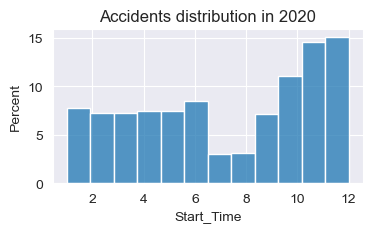

In [46]:
plt.figure(figsize=(4,2))
sns.histplot(data_2020.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2020')

Text(0.5, 1.0, 'Accidents distribution in 2021')

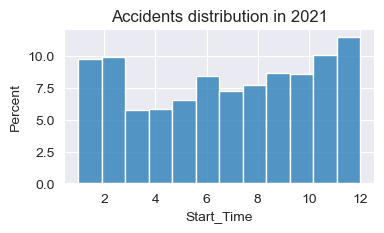

In [47]:
plt.figure(figsize=(4,2))
sns.histplot(data_2021.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2021')

Text(0.5, 1.0, 'Accidents distribution in 2022')

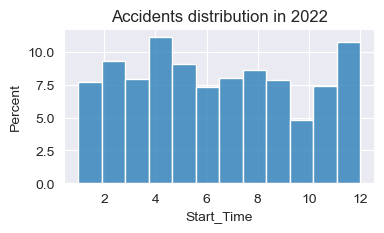

In [48]:
plt.figure(figsize=(4,2))
sns.histplot(data_2022.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2022')

Text(0.5, 1.0, 'Accidents distribution in 2023')

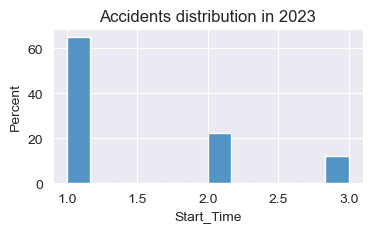

In [49]:
plt.figure(figsize=(4,2))
sns.histplot(data_2023.Start_Time.dt.month,bins=12, stat='percent')

plt.title('Accidents distribution in 2023')

From above graphs we can observed there are some missing data in the year of 2016,2019 and 2020. We can ignore the data for year 2023 as it is just for 3 months.


### SOURCE

In [50]:
data.Source.unique()

array(['Source2', 'Source3', 'Source1'], dtype=object)

<Axes: ylabel='count'>

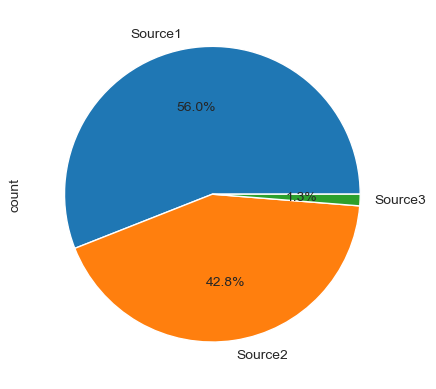

In [51]:
 data.Source.value_counts().plot(kind='pie',autopct='%.1f%%')

Consider eleminating source3 data , as it does not provide significant information

### Weather

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Rain                  84331
Haze                  76223
Fair / Windy          35671
Heavy Rain            32309
Light Drizzle         22684
Name: Weather_Condition, dtype: int64


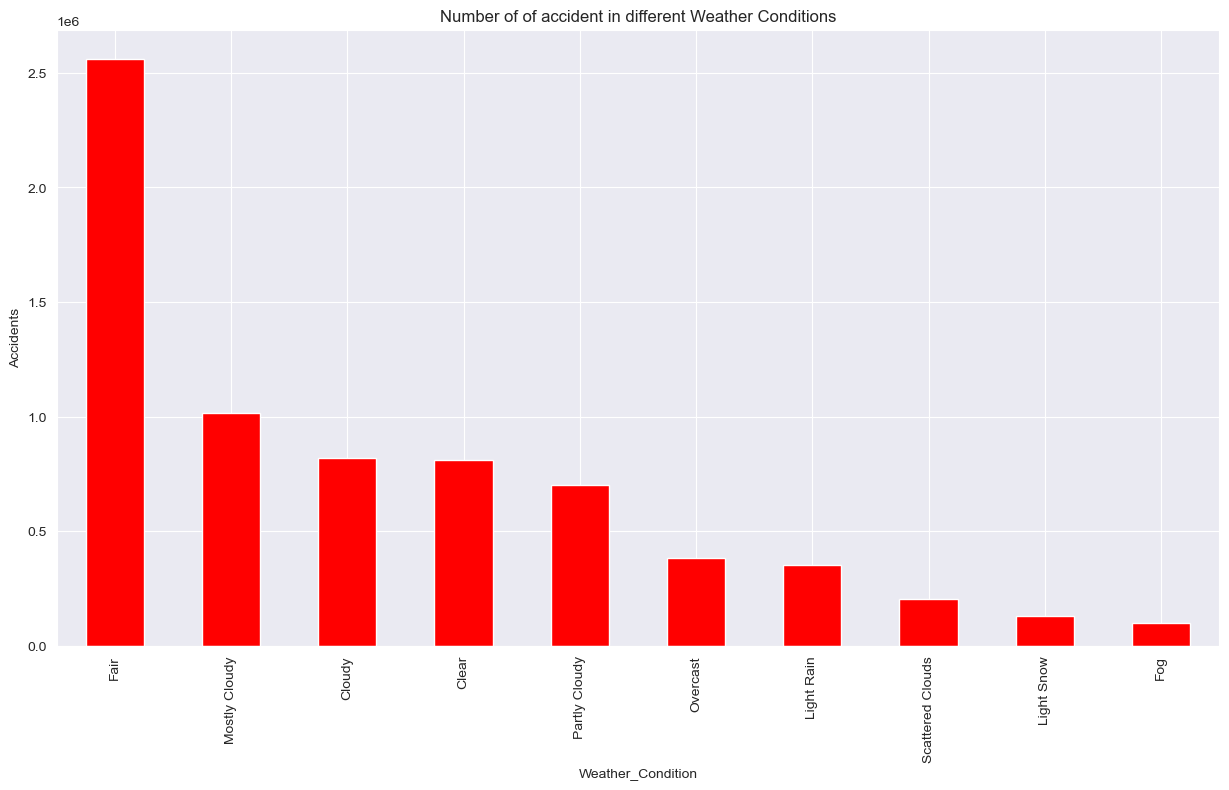

In [52]:
# how many accidents in different Weather_Condition
dfWe = data.groupby(['Weather_Condition'])['Weather_Condition'].count().sort_values(ascending=False)
print(dfWe.head(15))
#visualise how many accidents in Weather_Condition
dfWe2=dfWe.iloc[:10]
plt.figure(figsize=(15, 8))
dfWe2.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different Weather Conditions")
plt.show()

 From the above graph we can observe that most of the accidents are occured in fair weather condition

### Road Feature Analysis

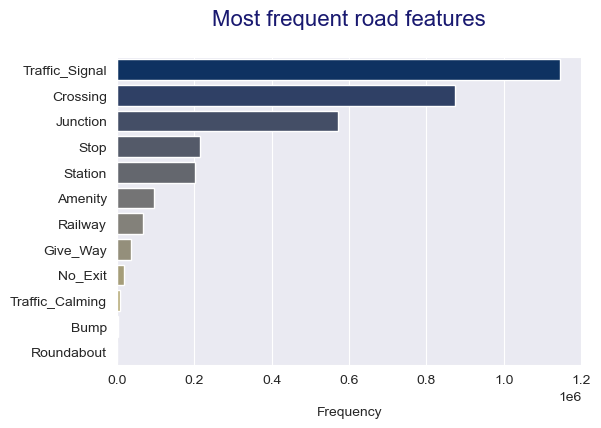

In [55]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]

road_analysis = data[road_features].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=road_analysis.values, y=road_analysis.index, orient="h", palette='cividis')
plt.title("Most frequent road features\n", fontsize=16, color='MidnightBlue')
plt.xlabel("\nFrequency")

plt.show()

From the above graph we can observe that the majority of the accidents occurred near a traffic signal, particularly near a junction or a crossing. Instead, the presence of a nearby station was the fourth most common road feature, most likely due to the high presence of vehicles.

# SUMMARY AND CONCLUSION

### INSIGHTS

<br>1. No data was found for NewYork City.
<br>2. The number of accidents per city decreases exponentially.
<br>3. Less than 8% of cities have more than 1000 yearly accidents.
<br>4. Almost 80% of the accidents has lead degree 2 injuries.
<br>5. The majority of accidents occurred between 7am and 9am and 3pm to 6pm, possibly due to rush hour, and the majority of accidents occurred on Fridays as opposed to weekends.
<br>6.Source3 data has some insignificant contributions that can be ignored for the analysis.
<br>7.The vast majority of accidents occur in Fair weather.
<br>8.The majority of the accidents occurred near a traffic signal, particularly near a junction or a crossing. Instead, the presence of a nearby station was the fourth most common road feature, most likely due to the high presence of vehicles.
<br>9.Over 1023 cities have reported just one accident (need to investigate)

### Thank you